In [23]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [24]:
# generating an array of 100 gene names
genes = ['gene'+str(i) for i in range(1,101)]
# generating arrays of sample names 'wild type as wt' and 'knock out as ko' five each
wt=['wt'+ str(i) for i in range(1,6)]
ko=['ko'+ str(i) for i in range(1,6)]
# create pandas datafram to store the made up data
d_frame=pd.DataFrame(columns=[*wt, *ko], index=genes)
# the stars unpack the wt and ko arrays so that the column names are a single array that looks like this
# [wt1,...wt6,ko1,...,ko6]
# without stars it would create an array of two arrays.

# create the random data
# the made up data comes from two poisson distributions: one for wt samples and one for ko samples.
# for each gene we select a new mean for the poisson dist. and it can vary betw. 10 and 1000.
# for each gene in index(gene1,...), we create 5 values for the 'wt' samples and 5 values for the 'ko' samples.
for gene in d_frame.index:
    d_frame.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    d_frame.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(d_frame.head())    

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  188  201  192  196  203  872  867  838  901  851
gene2  834  846  791  855  815  284  293  337  294  321
gene3   35   31   47   43   30  364  367  351  369  382
gene4  385  398  353  397  367  954  874  828  909  925
gene5  925  835  902  838  848  142  124  146  151  141


In [25]:
d_frame.shape

(100, 10)

In [26]:
# before doing PCA, we have to center and scale the data
scaled_d_frame=preprocessing.scale(d_frame.T)


Notice that we are passing in the transpose of our dataframe. the scale function expects the samples to be rows instead of columns. (acutally it scale the column this is why we need to transpose because we want each gene to be scaled individually)


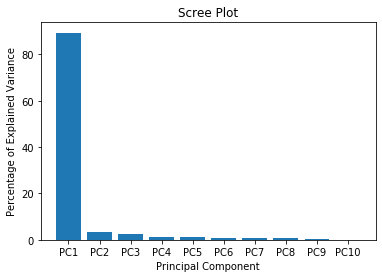

In [27]:
# Alternatively we could use StandardScalar().fit_transform(d_frame.T)
# create a PCA object. Rather than just have a function that does PCA and returns results, sklearn uses objects that can be trained using one dataset and applied to another dataset.
pca=PCA()
# Here we do all PCA math (calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_d_frame)
# Here we generate coordinates for a PCA graph based on the loading scores and the scaled data.
pca_d_frame=pca.transform(scaled_d_frame)

# we will start with scree plot to see how many principal components should go into the final plot.
# we calculate the percentage of variation that each principal component account for.
per_var=np.round(pca.explained_variance_ratio_* 100, decimals=1)
# we create labels for the scree plot (i.e. PC1, PC2 one label per principal component)
labels=['PC'+str(x) for x in range(1, len(per_var)+1)]
# using matplotlib to create bar a plot
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


So a 2-D graph, using PC1 and PC2 should do a good job representing the original data.

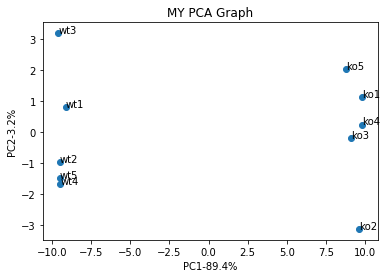

In [29]:
# to draw a PCA plot, we will first put the new coordinates, created by pca.transform(scaled.d_frame), into a nice matrix where the rows have sample labels and the columns have PC labels.
pca_df=pd.DataFrame(pca_d_frame, index=[*wt, *ko], columns=labels)
# these commands draw a scatter plot with a title and nice axis labels
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('MY PCA Graph')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))
# this loop('annotate') adds sample names to the graph
# per_var[0] denotes percentage of variation for PC1
# per_var[1] denotes percentage of variation for PC2
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()
# display the graph

 The 'wt' samples clustered on the left side, suggesting that they are correlated with each other
 
 Similarly 'ko' samples clusteres on the right side, suggesting.....
 
 Separation of the two clusters along the x-axis suggests that 'wt' samples are very different from 'ko' samples.

In [33]:
# look at the loading scores for pC1 to determine which gene had the largest infuence on the separating the two clusters anlong the x-axis.

# create a pandas series object with the loading scores in PC1
loading_scores=pd.Series(pca.components_[0], index=genes)
# note that PCs are zero-indexed, so PC1=0(index of PC1)
# now we sort the loading scores based on their magnitude(absolute value).
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
# here we are just getting the names of the top 10 indexes (which are the gene names).
top_10_genes=sorted_loading_scores[0:10].index.values
# print out the top 10 gene names and their corresponding loading scores.
print (loading_scores[top_10_genes])

gene95   -0.105701
gene1     0.105688
gene87    0.105681
gene70    0.105671
gene10   -0.105666
gene8    -0.105665
gene14    0.105658
gene56   -0.105652
gene27   -0.105650
gene53   -0.105639
dtype: float64


These values are almost similar, so a lot of genes played a role in separating the samples, rather than just one or two.